'Before Filtering the shape (785859, 38)'

'After Filter the shape (42315, 38)'

'Desire Filter shape (42315, 20)'

Schema([('Ration_Any_Item_Last_30_Days', Int16),
        ('Ration_Rice', Int16),
        ('Ration_Wheat', Int16),
        ('Ration_Coarse_Grain', Int16),
        ('Ration_Sugar', Int16),
        ('Ration_Pulses', Int16),
        ('Ration_Edible_Oil', Int16),
        ('Ration_Other_Food_Items', Int16),
        ('Online_Groceries', Int16),
        ('Online_Milk', Int16),
        ('Online_Vegetables', Int16),
        ('Online_Fresh_Fruits', Int16),
        ('Online_Dry_Fruits', Int16),
        ('Online_Egg_Fish_Meat', Int16),
        ('Online_Served_Processed_Food', Int16),
        ('Online_Packed_Processed_Food', Int16),
        ('Online_Other_Food_Items', Int16),
        ('Ceremony_Performed_Last_30_Days', Int16),
        ('Meals_Served_to_Non_HH_Members', Int16),
        ('Multiplier', Int16)])

Percentage of null values 
Ration_Any_Item_Last_30_Days ---> 0.00%
Ration_Rice ---> 36.85%
Ration_Wheat ---> 37.31%
Ration_Coarse_Grain ---> 100.00%
Ration_Sugar ---> 98.26%
Ration_Pulses ---> 100.00%
Ration_Edible_Oil ---> 100.00%
Ration_Other_Food_Items ---> 42.00%
Online_Groceries ---> 96.93%
Online_Milk ---> 99.26%
Online_Vegetables ---> 98.96%
Online_Fresh_Fruits ---> 99.06%
Online_Dry_Fruits ---> 99.28%
Online_Egg_Fish_Meat ---> 99.87%
Online_Served_Processed_Food ---> 99.28%
Online_Packed_Processed_Food ---> 98.67%
Online_Other_Food_Items ---> 99.55%
Ceremony_Performed_Last_30_Days ---> 0.00%
Meals_Served_to_Non_HH_Members ---> 0.00%
Multiplier ---> 89.81%


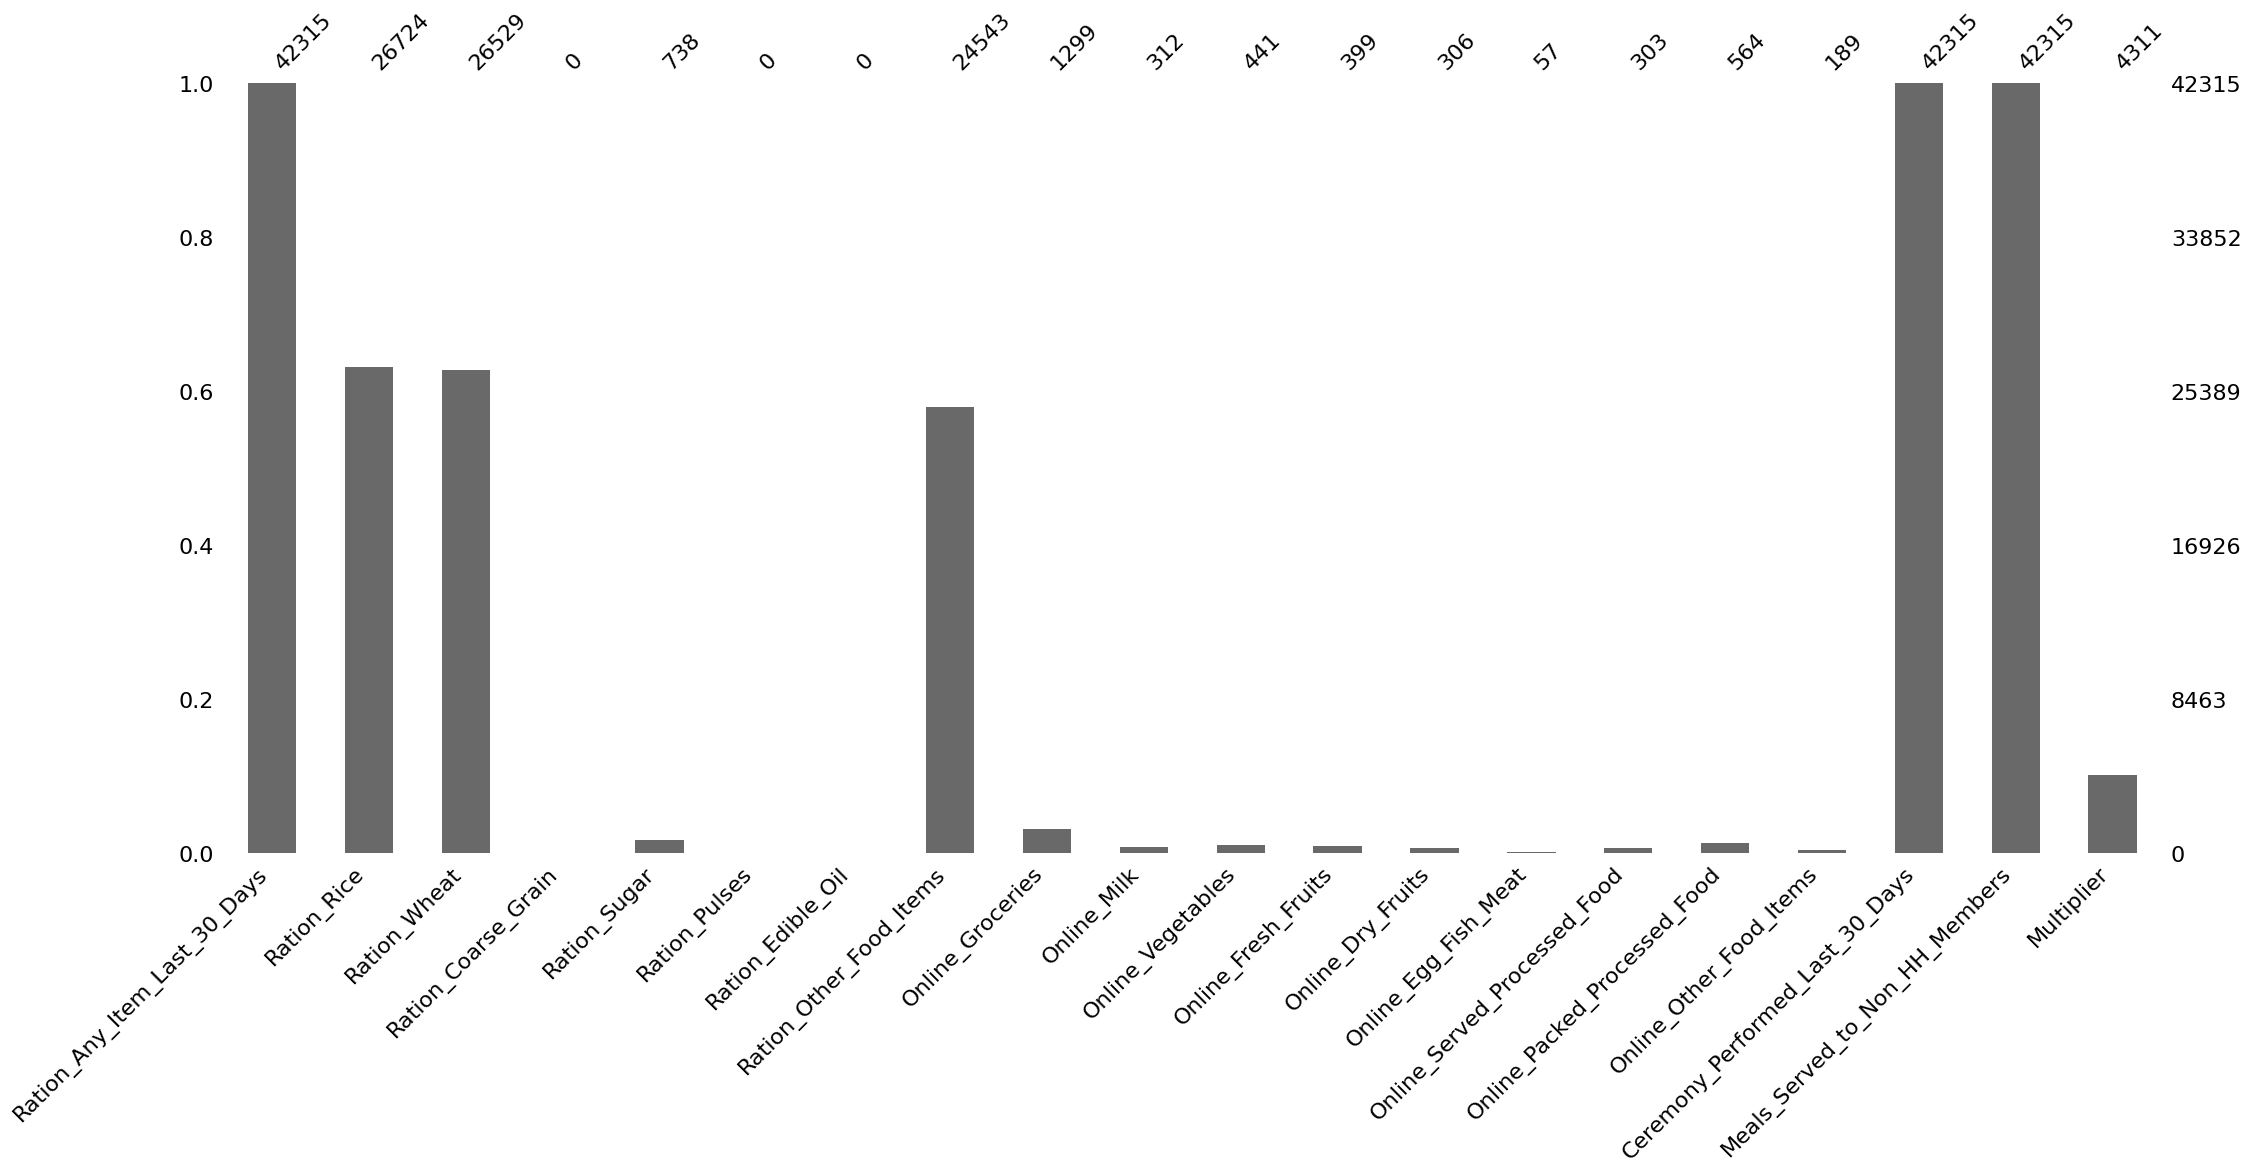

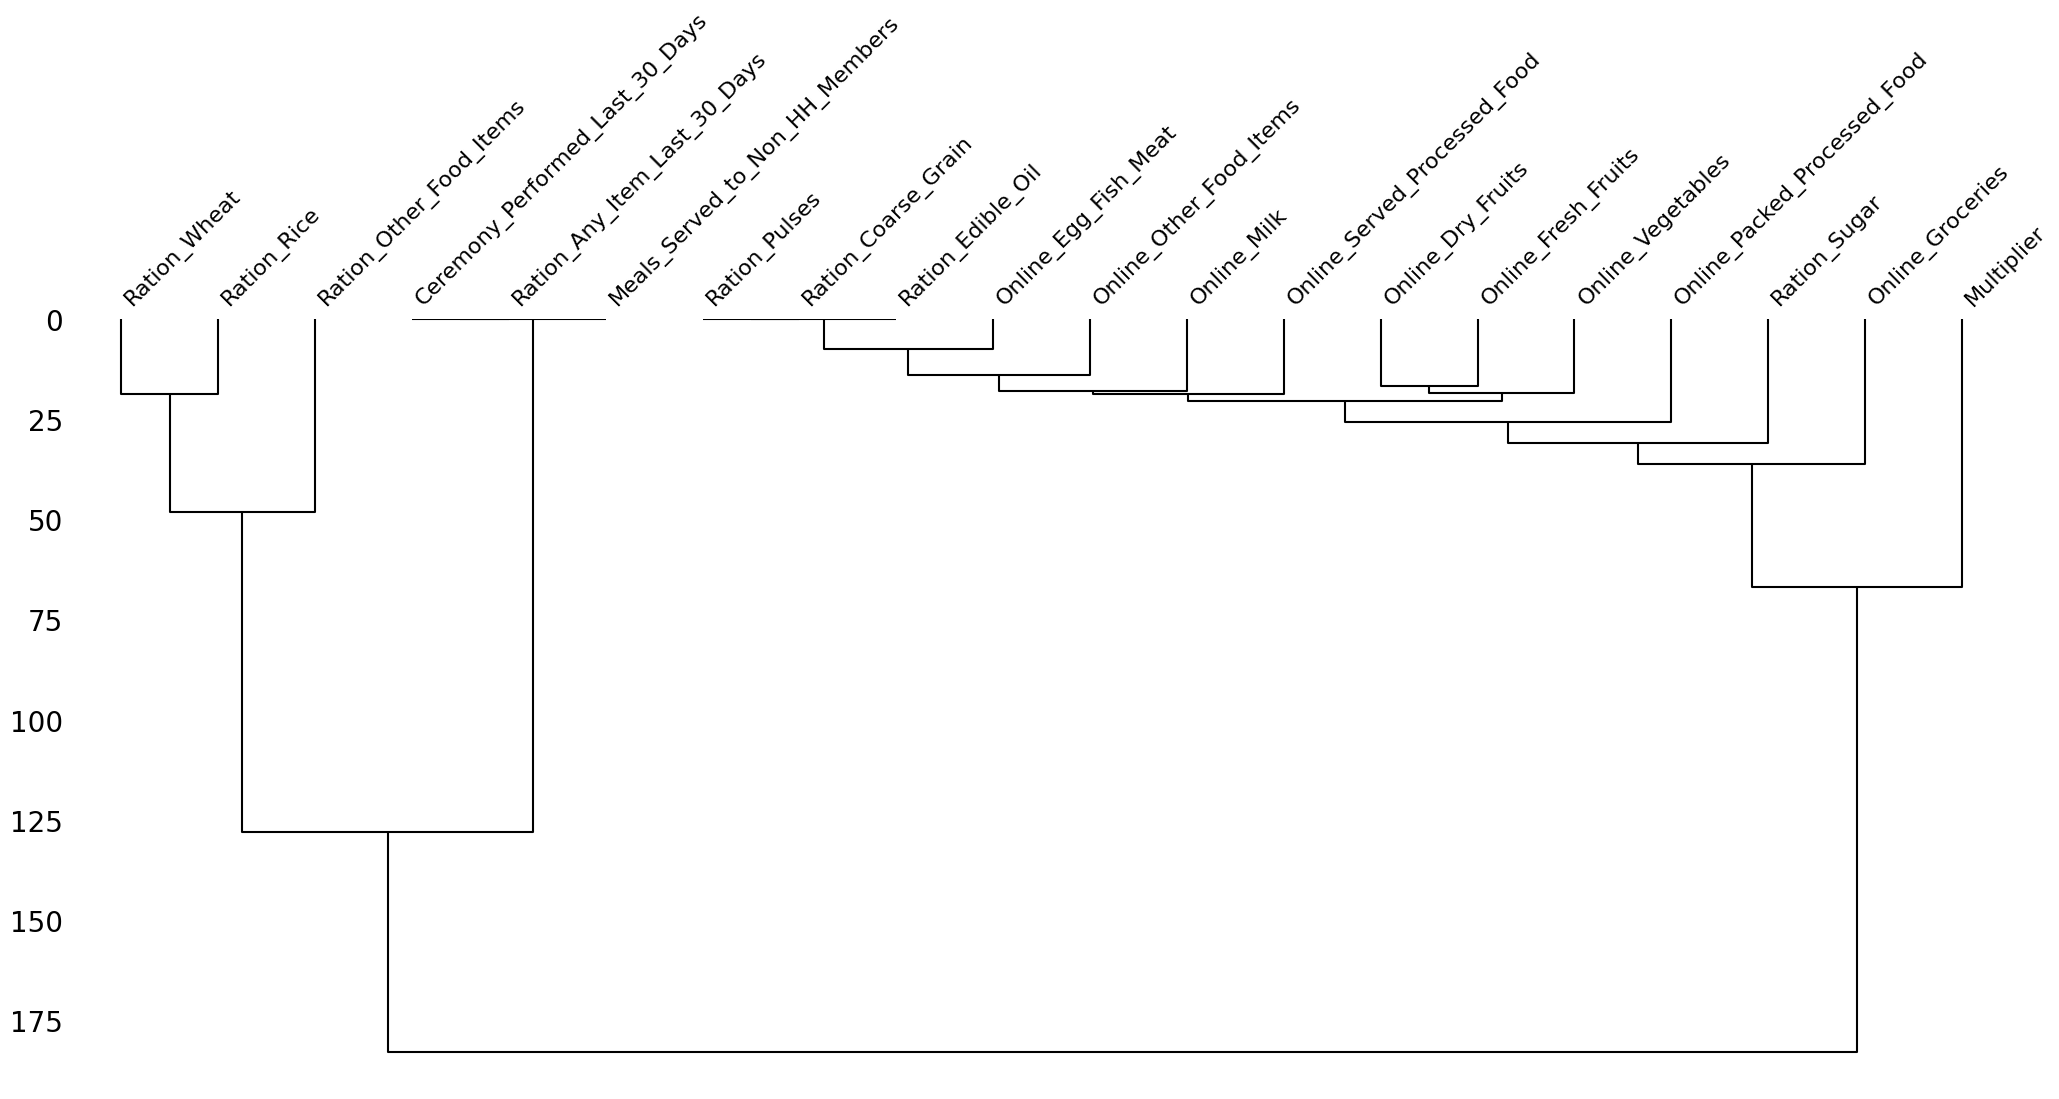

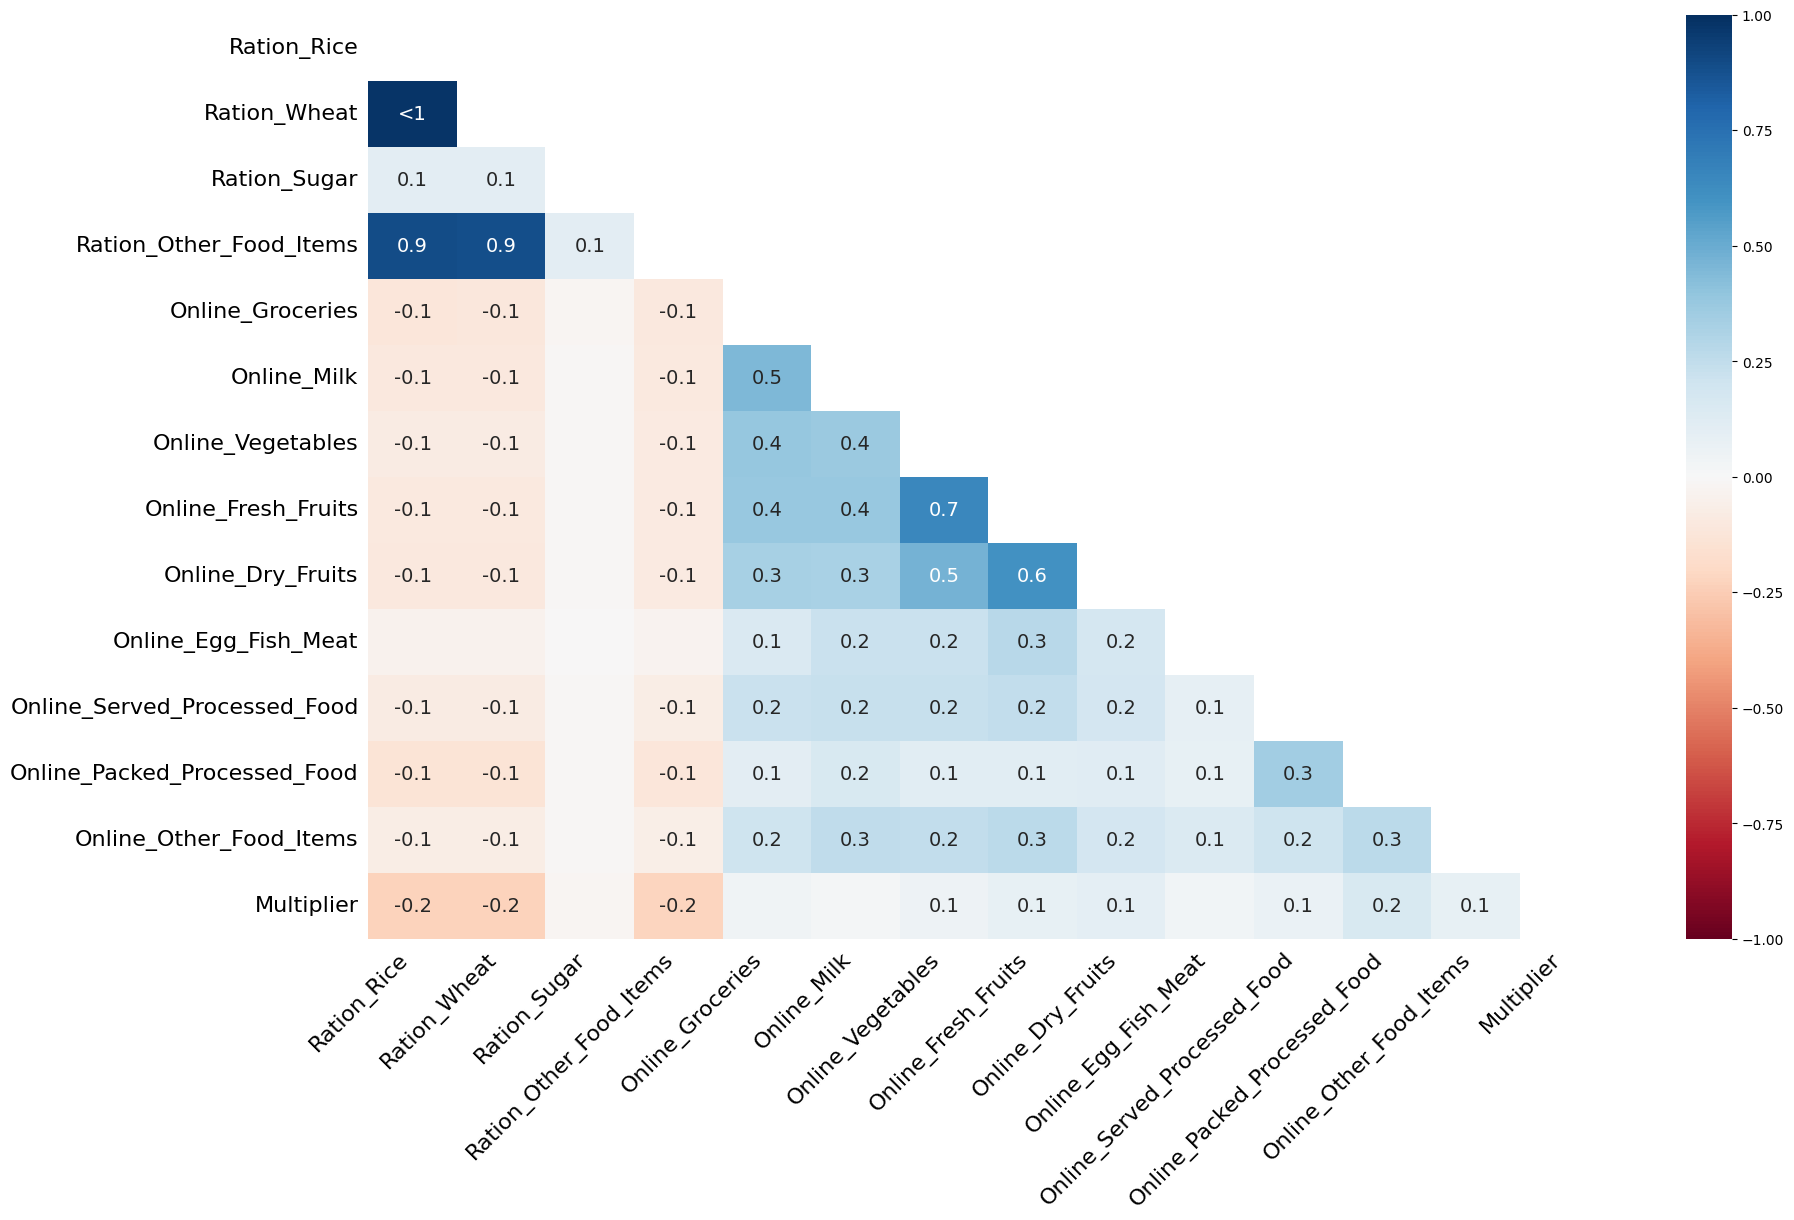

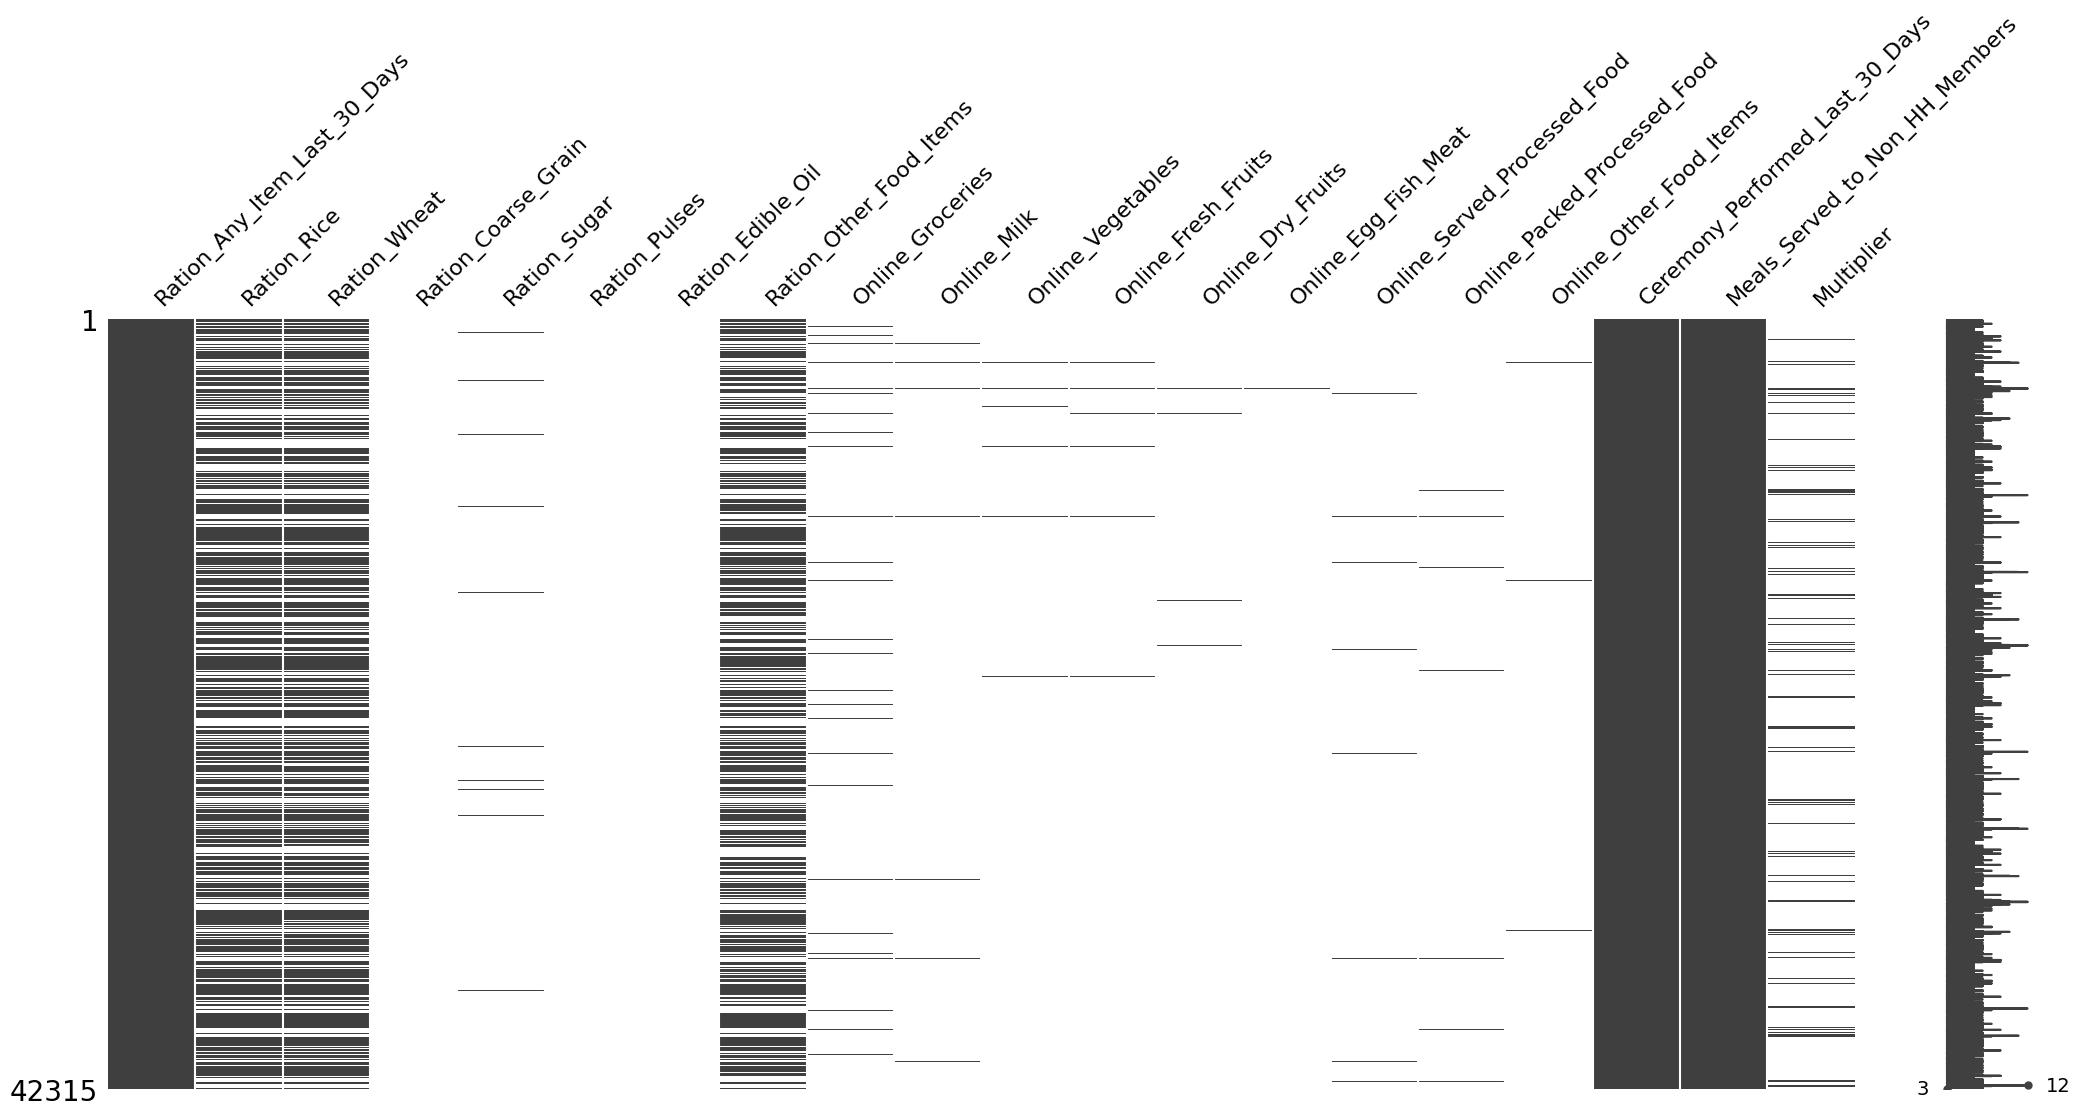

In [21]:
path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-04\data\lev-04_merged.parquet"

# import 
import pandas as pd
import polars as pl
import missingno as msgo
import matplotlib.pyplot as plt
import seaborn as sns

# Functions define for plot null
def plot_null(df: pd.DataFrame):
    msgo.bar(df)
    msgo.dendrogram(df)
    msgo.heatmap(df)
    msgo.matrix(df)

# Import Data and filter
pdf = pl.read_parquet(path)
display(f"Before Filtering the shape {pdf.shape}")
pdf = pdf.filter(
    pl.col('State') == '23'
)
display(f"After Filter the shape {pdf.shape}")

# ------------------------ Our useful variables are 
# ===============================

cols = [
'Ration_Any_Item_Last_30_Days',
'Ration_Rice',
'Ration_Wheat',
'Ration_Coarse_Grain',
'Ration_Sugar',
'Ration_Pulses',
'Ration_Edible_Oil',
'Ration_Other_Food_Items',
'Online_Groceries',
'Online_Milk',
'Online_Vegetables',
'Online_Fresh_Fruits',
'Online_Dry_Fruits',
'Online_Egg_Fish_Meat',
'Online_Served_Processed_Food',
'Online_Packed_Processed_Food',
'Online_Other_Food_Items',
'Ceremony_Performed_Last_30_Days',
'Meals_Served_to_Non_HH_Members',
'Multiplier',
]

pdf = pdf[cols]

display(f"Desire Filter shape {pdf.shape}")

# str -> int 
pdf = pdf.with_columns(
    [pl.col(col).cast(pl.Int16, strict=False) for col in pdf.columns]
)

display(pdf.schema)

# MP Data
mp_df = pdf.to_pandas()

print("Percentage of null values ")
for col in mp_df.columns:
    null_percentage = (mp_df[col].isnull().sum() / mp_df.shape[0]) * 100
    print(f"{col} ---> {null_percentage:.2f}%")
    
plot_null(mp_df)